# ANN for make simulation and make prediction in physics

# import working liberary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.layers import InputNormalization
from keras.optimizers import RMSprop
from openpyxl import Workbook
import openpyxl
from keras.models import load_model


# global variables

In [2]:
# input variable to program
inputFile = 'datasets/data 2017_pi+ 7.7.xlsx'
inputSheetName = 'main'
outputFile = 'out_in3.xlsx'
outputSheetName = 'predicat_in3'
nameFigImg = 'fig_in3.png'


# read data

In [3]:
# Read the data from the CSV file
data = pd.read_excel(inputFile,sheet_name=inputSheetName)
#data = data[data['N part']==337]
# Split the data into input and output variables
#X = data.drop('sqrt', axis=1) #static input for each case : extra data of fiting
#X = data.drop('massno', axis=1) #static input for each case : extra data of fiting
#X = data.drop('output', axis=1)

X = data.drop('Spectrum', axis=1)
#X = data['Pt']
y = data['Spectrum']

# loada saved model

In [4]:

# Load the saved model
#model = load_model('NegPion_L9.h5')

# define the model

In [5]:

# Define the model

model = Sequential()

# Normalize the input
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
# Add the first dense layer
model.add(Dense(30, input_dim=3, activation='relu'))
# Add batch normalization
model.add(BatchNormalization())

model.add(Dense(30, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(60, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(60, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))
#model.add(BatchNormalization())

model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
# Add the output layer
model.add(Dense(1, activation='linear'))
# Add the output layer
#model.add(Dense(1, activation='softmax'))


# compile the model

In [6]:
# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adam')
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# train the model

In [7]:
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=10000, batch_size=32)


Epoch 1/2000
8/8 [==============================] - 1s 2ms/step - loss: 243.9548 - accuracy: 0.0000e+00
Epoch 2/2000
8/8 [==============================] - 0s 1ms/step - loss: 212.5742 - accuracy: 0.0000e+00
Epoch 3/2000
8/8 [==============================] - 0s 2ms/step - loss: 195.8923 - accuracy: 0.0000e+00
Epoch 4/2000
8/8 [==============================] - 0s 2ms/step - loss: 188.0509 - accuracy: 0.0000e+00
Epoch 5/2000
8/8 [==============================] - 0s 2ms/step - loss: 176.1800 - accuracy: 0.0000e+00
Epoch 6/2000
8/8 [==============================] - 0s 2ms/step - loss: 168.1472 - accuracy: 0.0000e+00
Epoch 7/2000
8/8 [==============================] - 0s 2ms/step - loss: 161.2715 - accuracy: 0.0000e+00
Epoch 8/2000
8/8 [==============================] - 0s 2ms/step - loss: 159.1266 - accuracy: 0.0000e+00
Epoch 9/2000
8/8 [==============================] - 0s 2ms/step - loss: 156.5105 - accuracy: 0.0000e+00
Epoch 10/2000
8/8 [==============================] - 0s 2ms/step

# Evaluate the model

In [8]:
# Evaluate the model
#score = model.evaluate(X_train, y)
loss, accuracy = model.evaluate(X_train, y)

8/8 [==============================] - 0s 1ms/step - loss: 1.6245 - accuracy: 0.0000e+00


# save current compiled model

In [9]:
# Save the model
model.save('NegPion_L9_test.h5')

# make prediction

In [10]:
# Make predictions on new data
#new_data = pd.read_csv('data_pion_20.csv').drop('output', axis=1)
#new_data = X
#X_test = X.to_numpy() 
X_test = scaler.transform(X)
#predictions = model.predict(new_data)
#new_data = new_data.drop('Spectrum', axis=1)

#newX = new_data['Pt']
#newX = X_test

print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
print("predictions is : ")
print(predictions)


new_data is : 
[[-1.77635684e-15  1.70574344e+00 -1.29083930e+00]
 [-1.77635684e-15  1.70574344e+00 -1.18672070e+00]
 [-1.77635684e-15  1.70574344e+00 -1.08260210e+00]
 [-1.77635684e-15  1.70574344e+00 -9.78483494e-01]
 [-1.77635684e-15  1.70574344e+00 -8.74364891e-01]
 [-1.77635684e-15  1.70574344e+00 -7.70246288e-01]
 [-1.77635684e-15  1.70574344e+00 -6.66127685e-01]
 [-1.77635684e-15  1.70574344e+00 -5.62009082e-01]
 [-1.77635684e-15  1.70574344e+00 -4.57890479e-01]
 [-1.77635684e-15  1.70574344e+00 -3.53771876e-01]
 [-1.77635684e-15  1.70574344e+00 -9.26424192e-01]
 [-1.77635684e-15  1.70574344e+00 -7.18186986e-01]
 [-1.77635684e-15  1.70574344e+00 -5.09949780e-01]
 [-1.77635684e-15  1.70574344e+00 -3.01712574e-01]
 [-1.77635684e-15  1.70574344e+00 -9.34753680e-02]
 [-1.77635684e-15  1.70574344e+00  1.14761838e-01]
 [-1.77635684e-15  1.70574344e+00  3.22999044e-01]
 [-1.77635684e-15  1.70574344e+00  5.31236250e-01]
 [-1.77635684e-15  1.70574344e+00  7.39473456e-01]
 [-1.77635684e-1

# draw 

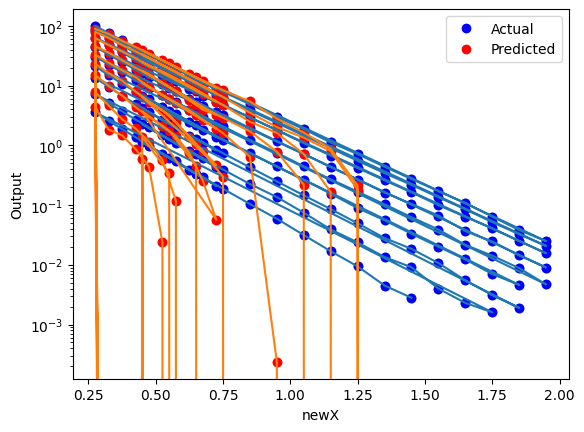

<Figure size 640x480 with 0 Axes>

In [11]:

# for drawing in 2d i choose Pt as x-axis
xg = X['Pt']
#xg = X_test[:,2:3]

# Plot the data and predictions
plt.plot(xg, y, 'bo', label='Actual')
plt.plot(xg, predictions, 'ro', label='Predicted')
plt.xlabel('newX')
plt.ylabel('Output')
plt.legend()

plt.semilogy(xg,  y)
plt.semilogy(xg, predictions)

plt.scatter(xg, y)
plt.scatter(xg, predictions)


plt.show()
plt.savefig(nameFigImg)

# write output to excel 

In [12]:

# Write predictions and plot data to Excel file
#output = pd.DataFrame({'y': X.values.flatten(), 'Actual': y.values.flatten()})
#outputpredicat = pd.DataFrame({'y': X.values.flatten(), 'Actual': y.values.flatten(), 'Predicted': predictions.flatten()})
outputpredicat = pd.DataFrame({ 'Pt': xg.values.flatten(),'Actual': y.values.flatten(), 'Predicted': predictions.flatten()})
# output is data frame

# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    #output.to_excel(writer, sheet_name='output', index=False)


# print model summery 

In [13]:

print("End")
print("accuracy :" + str(accuracy))
print("loss " + str(loss))
print(model.summary())

End
accuracy :0.0
loss 1.624549388885498
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                120       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 60)                1860      
                                                                 
 dense_3 (Dense)             (None, 60)                3660      
                                                                 
 dense_4 (Dense)             (None, 30)                1830      
               